#### RFM ANALYSIS  
RFM Analysis is a concept used especially in the marketing domain for understanding and segmenting customers based on their buying behaviour.  

Using RFM Analysis, a business can assess customers’:  
-recency (the date they made their last purchase).  
-frequency (how often they make purchases) and  
-monetary value (the amount spent on purchases)

Recency, Frequency, and Monetary value of a customer are key metrics that provide information about customer engagement, loyalty, and value to a business. 

This exercise touches on the workings of RFM Analysis and how is can be helpful to a business.  

Data Source:Aman Kharwal




In [1]:
# bring in necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# bring in the data set
df=pd.read_csv(r'C:\Users\user\Desktop\rfm_data.csv')

In [3]:
# have a quick view of top & lower layer of the data set
df.clip()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [4]:
# check the row and columns
df.shape

(1000, 6)

In [12]:
# check for missing values
df.isnull().sum()

CustomerID             0
PurchaseDate           0
TransactionAmount      0
ProductInformation     0
OrderID                0
Location               0
Recency                0
Frequency              0
MonetaryValue          0
RecencyScore           0
FrequencyScore         0
MonetaryScore          0
RFM_Score              0
ValueSegment           0
RFM_CustomerSegment    0
dtype: int64

#### Part 1:  
-convert PurchaseDate to datetime.  
-calculate the Recency,Frequency and MonetaryValue

In [5]:
from datetime import datetime

# conversion
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

# calcuate Recency
df['Recency'] = (pd.Timestamp.now() - df['PurchaseDate']).dt.days

# calculate Frequency
Frequency_Record = df.groupby('CustomerID')['OrderID'].count().reset_index()
Frequency_Record.rename(columns ={'OrderID':'Frequency'}, inplace = True)
df=df.merge(Frequency_Record, on='CustomerID',how='left')

# calculate MonetaryValue
Monetary_Record = df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
Monetary_Record.rename(columns ={'TransactionAmount':'MonetaryValue'}, inplace = True)
df=df.merge(Monetary_Record,on='CustomerID',how='left')

df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,753,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,753,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,753,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,753,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,753,1,739.56
...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,693,1,759.62
996,6669,2023-06-10,941.50,Product C,987025,New York,693,1,941.50
997,8836,2023-06-10,545.36,Product C,512842,London,693,1,545.36
998,1440,2023-06-10,729.94,Product B,559753,Paris,693,1,729.94


#### Part 2.  
-calculate the RFM scores  
-convert to int

In [6]:
# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
df['RecencyScore'] = pd.cut(df['Recency'], bins=5, labels=recency_scores)
df['FrequencyScore'] = pd.cut(df['Frequency'], bins=5, labels=frequency_scores)
df['MonetaryScore'] = pd.cut(df['MonetaryValue'], bins=5, labels=monetary_scores)
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,753,1,943.31,1,1,2
1,2188,2023-04-11,463.70,Product A,176819,London,753,1,463.70,1,1,1
2,4608,2023-04-11,80.28,Product A,340062,New York,753,1,80.28,1,1,1
3,2559,2023-04-11,221.29,Product A,239145,London,753,1,221.29,1,1,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,753,1,739.56,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,693,1,759.62,5,1,2
996,6669,2023-06-10,941.50,Product C,987025,New York,693,1,941.50,5,1,2
997,8836,2023-06-10,545.36,Product C,512842,London,693,1,545.36,5,1,2
998,1440,2023-06-10,729.94,Product B,559753,Paris,693,1,729.94,5,1,2


In [7]:
# Convert RFM scores to numeric type
df['RecencyScore'] = df['RecencyScore'].astype(int)
df['FrequencyScore'] = df['FrequencyScore'].astype(int)
df['MonetaryScore'] = df['MonetaryScore'].astype(int)

#### Part 4.  
-sum up the individual scores(RFM)  
-create value segments from the scores(RFM). This gives a picture of the value of customers  
-visualize the ValueSegment

In [8]:
# Calculate RFM score by combining the individual scores
df['RFM_Score'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['LowValue', 'MidValue', 'HighValue']
df['ValueSegment'] = pd.qcut(df['RFM_Score'], q=3, labels=segment_labels)
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,ValueSegment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,753,1,943.31,1,1,2,4,LowValue
1,2188,2023-04-11,463.70,Product A,176819,London,753,1,463.70,1,1,1,3,LowValue
2,4608,2023-04-11,80.28,Product A,340062,New York,753,1,80.28,1,1,1,3,LowValue
3,2559,2023-04-11,221.29,Product A,239145,London,753,1,221.29,1,1,1,3,LowValue
4,9482,2023-04-11,739.56,Product A,194545,Paris,753,1,739.56,1,1,2,4,LowValue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,693,1,759.62,5,1,2,8,HighValue
996,6669,2023-06-10,941.50,Product C,987025,New York,693,1,941.50,5,1,2,8,HighValue
997,8836,2023-06-10,545.36,Product C,512842,London,693,1,545.36,5,1,2,8,HighValue
998,1440,2023-06-10,729.94,Product B,559753,Paris,693,1,729.94,5,1,2,8,HighValue


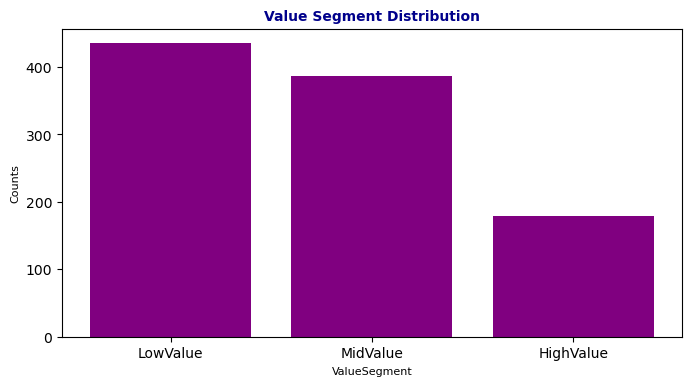

In [9]:
# visualize the distribution
vs = df['ValueSegment'].value_counts()

fig,ax = plt.subplots(figsize=(8,4))

ax.bar(vs.index,vs.values,color='purple')
ax.set_title('Value Segment Distribution',fontsize=10,fontweight='bold',color='darkblue')
ax.set_xlabel('ValueSegment',fontsize=8)
ax.set_ylabel('Counts',fontsize=8)
plt.show()

#### Part 5.  
-create RFM customer segment from the RFM scores-This is an indication of the behaviour of customers  
-visualize the RFM_customersegment distruibution


In [10]:
# function to assign values

def assign_segment(score):
    if score >= 9:
        return 'Champions'
    elif score >= 6:
        return 'Potential Loyalists'
    elif score >= 5:
        return 'At Risk Customers'
    elif score >= 4:
        return "Can't Lose"
    else:
        return 'Lost'
    
df['RFM_CustomerSegment'] = df['RFM_Score'].apply(assign_segment)
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,ValueSegment,RFM_CustomerSegment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,753,1,943.31,1,1,2,4,LowValue,Can't Lose
1,2188,2023-04-11,463.70,Product A,176819,London,753,1,463.70,1,1,1,3,LowValue,Lost
2,4608,2023-04-11,80.28,Product A,340062,New York,753,1,80.28,1,1,1,3,LowValue,Lost
3,2559,2023-04-11,221.29,Product A,239145,London,753,1,221.29,1,1,1,3,LowValue,Lost
4,9482,2023-04-11,739.56,Product A,194545,Paris,753,1,739.56,1,1,2,4,LowValue,Can't Lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,693,1,759.62,5,1,2,8,HighValue,Potential Loyalists
996,6669,2023-06-10,941.50,Product C,987025,New York,693,1,941.50,5,1,2,8,HighValue,Potential Loyalists
997,8836,2023-06-10,545.36,Product C,512842,London,693,1,545.36,5,1,2,8,HighValue,Potential Loyalists
998,1440,2023-06-10,729.94,Product B,559753,Paris,693,1,729.94,5,1,2,8,HighValue,Potential Loyalists


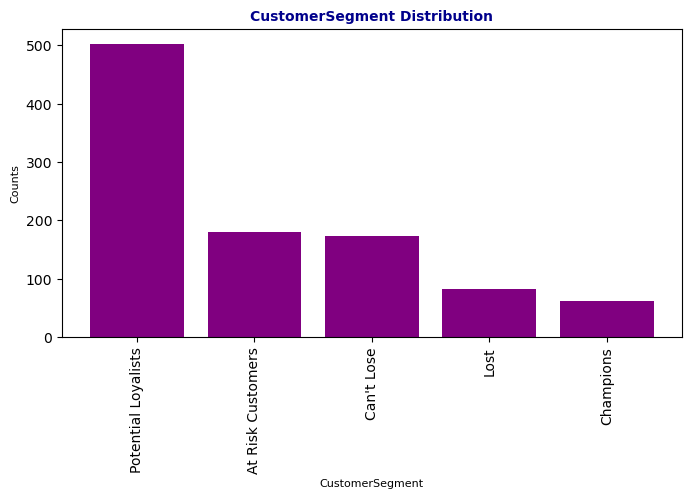

In [11]:
# visualize the distribution
cs = df['RFM_CustomerSegment'].value_counts()

fig,ax = plt.subplots(figsize=(8,4))

ax.bar(cs.index,cs.values,color='purple')
ax.set_title('CustomerSegment Distribution',fontsize=10,fontweight='bold',color='darkblue')
ax.set_xlabel('CustomerSegment',fontsize=8)
ax.set_ylabel('Counts',fontsize=8)
plt.xticks(rotation = 90)
plt.show()

#### Summary  
This gives a simple guide on how to analyze and harness RFM